In [2]:
import numpy as np
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [9]:
# 生成数据集
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b  # 矩阵乘法操作
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [10]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([-0.6143, -1.6471]) 
label: tensor([8.5845])


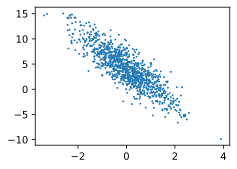

In [11]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

In [12]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i+batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [28]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 1.0328, -1.8860],
        [ 1.5567, -1.5066],
        [-0.1261,  0.2854],
        [-0.3761, -0.2692],
        [-1.5373,  0.0537],
        [-0.6160, -0.1417],
        [-0.4928, -1.1688],
        [ 0.4044,  0.9666],
        [-0.1992, -1.2362],
        [-0.5065, -0.8970]]) 
 tensor([[12.6755],
        [12.4373],
        [ 2.9710],
        [ 4.3623],
        [ 0.9521],
        [ 3.4421],
        [ 7.1808],
        [ 1.7288],
        [ 8.0125],
        [ 6.2278]])


In [40]:
# 采样随机数初始化权重，并将偏置初始化为0
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

tensor([0.], requires_grad=True)

In [30]:
def linreg(X, w, b):
    """线性回归模型"""
    return torch.matmul(X, w) + b

In [31]:
# 定义损失函数
def squared_loss(y_hat, y):
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape))**2/2

In [32]:
# 定义优化算法

In [33]:
def sgd(params, lr, batch_size):
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [34]:
# 训练

In [50]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss
batch_size = 10
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f"epoch{epoch + 1}, loss {float(train_l.mean()):f}")

epoch1, loss [[7.80034534e-05]
 [7.99179470e-05]
 [1.39191598e-05]
 [3.47168098e-04]
 [1.58619678e-05]
 [7.16722752e-06]
 [3.06936454e-06]
 [3.30222861e-06]
 [3.46298293e-05]
 [5.64187685e-05]
 [6.16069228e-05]
 [2.73026908e-05]
 [8.95713725e-08]
 [6.89554290e-05]
 [3.60068807e-05]
 [4.79822047e-05]
 [1.82026299e-04]
 [1.23804966e-06]
 [7.11586745e-06]
 [7.01928802e-05]
 [8.78238134e-05]
 [1.82686505e-04]
 [6.86360409e-06]
 [5.87469694e-05]
 [2.76916635e-05]
 [1.96769561e-05]
 [9.24847554e-05]
 [2.57640422e-05]
 [2.61910918e-05]
 [7.56393129e-05]
 [3.84605373e-05]
 [6.01847969e-05]
 [7.11316943e-08]
 [4.58125032e-06]
 [9.11632960e-05]
 [3.28554961e-09]
 [1.31985007e-05]
 [3.54604213e-04]
 [3.91452340e-05]
 [5.41996742e-05]
 [3.70497182e-05]
 [2.32395236e-04]
 [4.47816346e-05]
 [1.88983366e-04]
 [3.48923095e-06]
 [1.07400148e-04]
 [2.57154352e-06]
 [1.24707003e-06]
 [8.93916949e-05]
 [8.86949128e-05]
 [2.64011669e-05]
 [3.30800685e-05]
 [3.05874073e-06]
 [5.77776402e-04]
 [3.06464062e-0

In [46]:
from collections import defaultdict

In [83]:
lrs = np.arange(0.01, 0.11, 0.01)
num_epochs = 3
net = linreg
loss = squared_loss
batch_size = 10
all_loss = defaultdict(int)
train_all_loss = []
for lr in lrs:
    for epoch in range(num_epochs):
        for X, y in data_iter(batch_size, features, labels):
            l = loss(net(X, w, b), y)
            l.sum().backward()
            sgd([w, b], lr, batch_size)
        with torch.no_grad():
            train_l = loss(net(features, w, b), labels)
            train_all_loss.append(float(train_l.mean()))

    all_loss[lr] = train_all_loss
    train_all_loss = []

In [84]:
import numpy as np
import matplotlib.pyplot as plt

TypeError: float() argument must be a string or a number, not 'type'

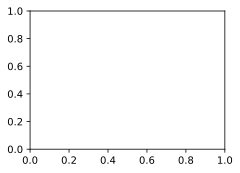

In [85]:
plt.plot(defaultdict)

In [72]:
lrs

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])